In [1]:
import torch
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer

**distilbert-base-uncased**

**Task A**

In [3]:
model_path = "C:/Users/mufdu/Desktop/New folder/DL/New folder/SemEval-2023-Task-10-EDOS/results/checkpoint-10500"

model = AutoModelForSequenceClassification.from_pretrained(
        model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)


In [5]:
with torch.no_grad():
            text = "Women and men are equal"
            
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            predicted_class_id = np.argmax(outputs.logits.numpy()[0])
            print(model.config.id2label[predicted_class_id])

not sexist


In [2]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |

In [8]:
from datasets import load_dataset

In [18]:
df = load_dataset("json", data_files={
        "train": f'preprocessed\label_sexist_train.json', "validation": f'preprocessed\label_sexist_valid.json'})
df["validation"]

Using custom data configuration default-9151cc302f0a5959
Found cached dataset json (C:/Users/mufdu/.cache/huggingface/datasets/json/default-9151cc302f0a5959/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/2 [00:00<?, ?it/s]

Dataset({
    features: ['idx', 'text', 'label'],
    num_rows: 2800
})

In [19]:
import pandas as pd
df = pd.DataFrame(df["validation"])
df = df.drop('idx', axis=1)
df.head()

,text,label
0,Shes not a real woman for being so reckless,1
1,If you think women are giving their numbers ou...,0
2,we have to stop the Jewish War on Whiteness,0
3,"Happy birthday, fren. I hate women too :)",1
4,It's sexist to not let transgendereds split th...,1


In [20]:
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [23]:
true_vals = df['label'].tolist()
# true_vals

In [24]:
predicted_vals = []
for t in df['text'].tolist():
    with torch.no_grad():
                # text = "Women and men are equal"
                inputs = tokenizer(t, return_tensors="pt")
                outputs = model(**inputs)
                predicted_class_id = np.argmax(outputs.logits.numpy()[0])
                predicted_vals.append(predicted_class_id)
                print(model.config.id2label[predicted_class_id])

not sexist
not sexist
not sexist
not sexist
sexist
not sexist
sexist
sexist
sexist
sexist
not sexist
sexist
sexist
not sexist
not sexist
not sexist
sexist
not sexist
sexist
not sexist
not sexist
not sexist
not sexist
not sexist
sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
sexist
not sexist
not sexist
sexist
not sexist
sexist
not sexist
not sexist
not sexist
sexist
not sexist
sexist
not sexist
not sexist
not sexist
not sexist
not sexist
sexist
sexist
not sexist
sexist
not sexist
not sexist
not sexist
not sexist
sexist
not sexist
not sexist
sexist
not sexist
sexist
sexist
sexist
sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
sexist
sexist
not sexist
sexist
not sexist
not sexist
not sexist
not sexist
sexist
not sexist
sexist
not sexist
not sexist
not sexist
not sexist
sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexist
not sexis

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [27]:
accuracy = accuracy_score(y_true = true_vals, y_pred = predicted_vals )
f1 = f1_score(y_true = true_vals, y_pred = predicted_vals, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = true_vals, y_pred = predicted_vals ))

The accuracy from sentiment classification: 0.8810714285714286
with f1 score: 0.8779088701279163
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2120
           1       0.80      0.69      0.74       680

    accuracy                           0.88      2800
   macro avg       0.85      0.81      0.83      2800
weighted avg       0.88      0.88      0.88      2800



Text(0.5, 1.0, 'Sentiment classification')

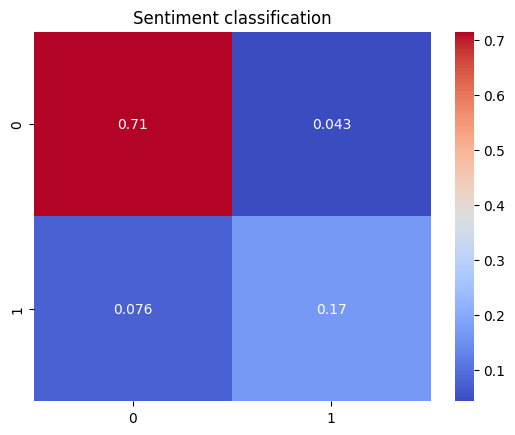

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_true= true_vals, y_pred = predicted_vals) / len(predicted_vals), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [16]:
model_path = "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/results/checkpoint-2550"

model = AutoModelForSequenceClassification.from_pretrained(
        model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [18]:
with torch.no_grad():
            text = "I personally would have hit that bitch and she'd never have done it again"
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            predicted_class_id = np.argmax(outputs.logits.numpy()[0])
            print(model.config.id2label[predicted_class_id])

2. derogation


In [21]:
df = load_dataset("json", data_files={
        "train": f'preprocessed\label_category_train.json', "validation": f'preprocessed\label_category_valid.json'})
df["validation"]

Using custom data configuration default-0be2dd269c05f961
Found cached dataset json (C:/Users/mufdu/.cache/huggingface/datasets/json/default-0be2dd269c05f961/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/2 [00:00<?, ?it/s]

Dataset({
    features: ['idx', 'text', 'label'],
    num_rows: 680
})

In [22]:
import pandas as pd
df = pd.DataFrame(df["validation"])
df = df.drop('idx', axis=1)
df.head()

,text,label
0,"Kick her in the balls first, then jail the old...",0
1,"It’s good to have a pretty, white First Lady a...",1
2,Why do these people have a desire to become ug...,1
3,"[USER] Let's be honest, he was screwing her/it...",1
4,Another whore with no strong father figure in ...,1


In [23]:
true_vals = df['label'].tolist()

In [24]:
predicted_vals = []
for t in df['text'].tolist():
    with torch.no_grad():
                inputs = tokenizer(t, return_tensors="pt")
                outputs = model(**inputs)
                predicted_class_id = np.argmax(outputs.logits.numpy()[0])
                predicted_vals.append(predicted_class_id)
                # print(model.config.id2label[predicted_class_id])

In [25]:
accuracy = accuracy_score(y_true = true_vals, y_pred = predicted_vals )
f1 = f1_score(y_true = true_vals, y_pred = predicted_vals, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = true_vals, y_pred = predicted_vals ))

The accuracy from sentiment classification: 0.5014705882352941
with f1 score: 0.4079847513014629
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.49      0.91      0.64       318
           2       0.56      0.22      0.32       233
           3       0.00      0.00      0.00        67

    accuracy                           0.50       680
   macro avg       0.26      0.28      0.24       680
weighted avg       0.42      0.50      0.41       680



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Sentiment classification')

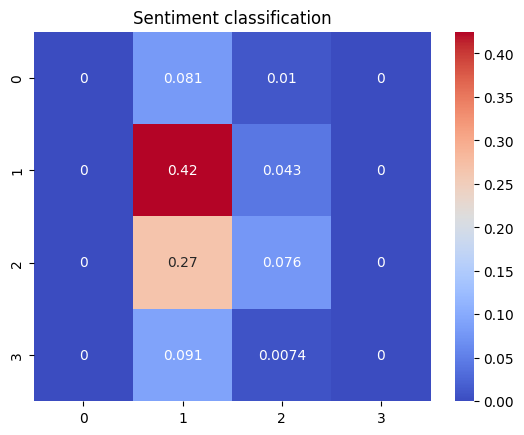

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_true= true_vals, y_pred = predicted_vals) / len(predicted_vals), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [27]:
model_path = "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/results/checkpoint-2550"

model = AutoModelForSequenceClassification.from_pretrained(
        model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [28]:
with torch.no_grad():
            text = "I personally would have hit that bitch and she'd never have done it again"
            inputs = tokenizer(text, return_tensors="pt")
            outputs = model(**inputs)
            predicted_class_id = np.argmax(outputs.logits.numpy()[0])
            print(model.config.id2label[predicted_class_id])

2.2 aggressive and emotive attacks


In [33]:
df = load_dataset("json", data_files={
        "train": f'preprocessed\label_vector_train.json', "validation": f'preprocessed\label_vector_valid.json'})
df["validation"]

Using custom data configuration default-8169304ba22fe091
Found cached dataset json (C:/Users/mufdu/.cache/huggingface/datasets/json/default-8169304ba22fe091/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/2 [00:00<?, ?it/s]

Dataset({
    features: ['idx', 'text', 'label'],
    num_rows: 680
})

In [34]:
import pandas as pd
df = pd.DataFrame(df["validation"])
df = df.drop('idx', axis=1)
df.head()

,text,label
0,[USER] I wonder what keeps that witch looking ...,3
1,"New world order lady, men give zero fucks. Wha...",10
2,"Marries bitch with daddy issues and now this, ...",3
3,In Miami where I'm from most girls will dump y...,6
4,A world run by women will make hell seem like ...,2


In [36]:
true_vals = df['label'].tolist()
# true_vals

In [37]:
predicted_vals = []
for t in df['text'].tolist():
    with torch.no_grad():
                inputs = tokenizer(t, return_tensors="pt")
                outputs = model(**inputs)
                predicted_class_id = np.argmax(outputs.logits.numpy()[0])
                predicted_vals.append(predicted_class_id)
                # print(model.config.id2label[predicted_class_id])

In [38]:
accuracy = accuracy_score(y_true = true_vals, y_pred = predicted_vals )
f1 = f1_score(y_true = true_vals, y_pred = predicted_vals, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = true_vals, y_pred = predicted_vals ))

The accuracy from sentiment classification: 0.3426470588235294
with f1 score: 0.23555305395724777
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        51
           2       0.32      0.85      0.47       144
           3       0.35      0.66      0.46       135
           4       0.00      0.00      0.00        40
           5       0.44      0.17      0.24       127
           6       0.00      0.00      0.00        83
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        52

    accuracy                           0.34       680
   macro avg       0.10      0.15      0.11       680
weighted avg       0.22      0.34      0.24       680



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Sentiment classification')

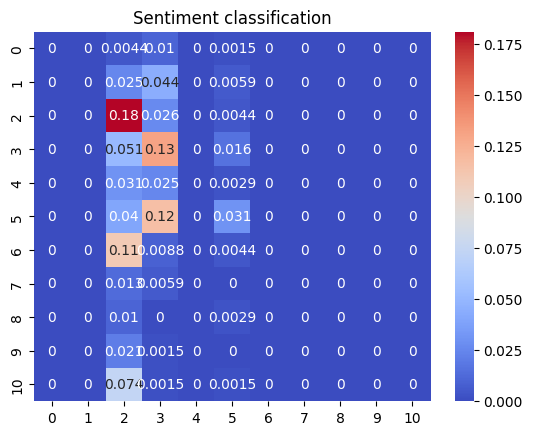

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_true= true_vals, y_pred = predicted_vals) / len(predicted_vals), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')